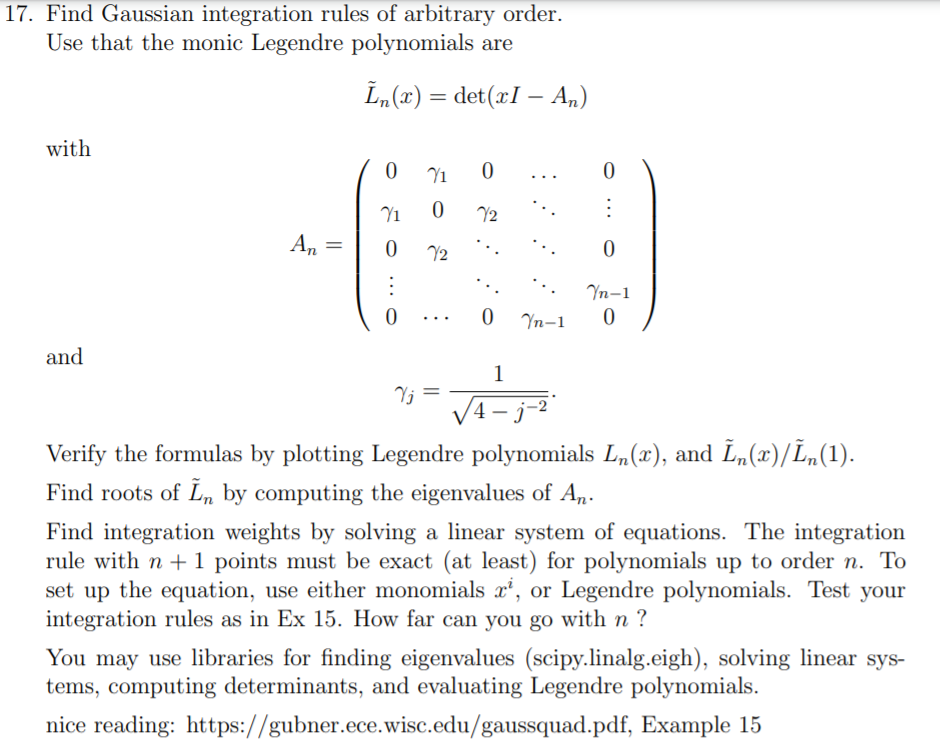

In [1]:
import numpy as np
import scipy.special
import scipy.linalg as lina
import matplotlib.pyplot as plot

def QuadIntegration(function, interval, m, rule):
    """
    Numerical integration by composite integration with
    quadrature rules
    function: function to integrate
    interval: [a,b] interval to integrate on
    m: number of subintervals to partition to
    rule: [[c0,w0],...[cn,wn]] quadrature rule to use
    """
    h = (interval[1]-interval[0])/m
    #catch 1 dimensional array
    rule = np.array(rule, ndmin = 2)
    #get number of points for rule
    k = np.shape(rule)[0]
    t = interval[0]
    Q = 0
    
    for i in range(m):
        for j in range(k):
            w = rule[j][1]
            x = t + h*rule[j][0]
            Q += w * function(x)
        t += h
        
    return h*Q

def LegendrePol(x, n):
    """
    evaluates monic Legendre polynomial with order n in point x
    """
    A_n = np.zeros((n, n))
    lbasis = lambda i : 1./((4-i**(-2))**(1/2))
    
    for i in range(0,n):
        if i-1 >= 0 :
            A_n[i][i-1] = lbasis(i)
        if i+1 <= n-1:
            A_n[i][i+1] = lbasis(i+1)
    
    #print(A_n)
    X = np.identity(n) * x
    return lina.det(X-A_n)

def LegendreQuad(n):
    A_n = np.zeros((n,n))
    lbasis = lambda i : 1./((4-i**(-2))**(1/2))
    for i in range(0,n):
        if i-1 >= 0 :
            A_n[i][i-1] = lbasis(i)
        if i+1 <= n-1:
            A_n[i][i+1] = lbasis(i+1)
    
    #points are eigenvalues of A_n and weigths are 2*v^2
    #where v is a vector comprised of the first element of each eigenvector
    
    l, v = lina.eigh(A_n)
    #scale to reference interval [0,1] to use function from Ex15
    
    w = v[0]**2
    l = l / 2
    l = np.ones_like(l)*.5 + l
    pairs = np.array((l,w))
    pairs = np.swapaxes(pairs, 0, 1)
    return pairs


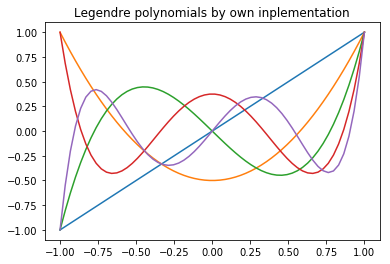

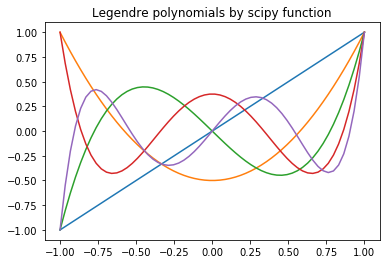

In [2]:
n_min = 1
n_max = 6
X = np.linspace(-1,1,60)
Y = np.zeros((n_max,60))

for i in range(n_min,n_max):
    normation = LegendrePol(1,i)
    for x in range(len(X)):
        Y[i][x] = LegendrePol(X[x],i) / normation
     
    
    plot.figure(1)
    plot.plot(X,Y[i])
    legendre = scipy.special.legendre(i)

    plot.figure(2)
    plot.plot(X,np.polyval(legendre, X))

plot.figure(1)
plot.title("Legendre polynomials by own inplementation")

plot.figure(2)
plot.title("Legendre polynomials by scipy function")
plot.show()

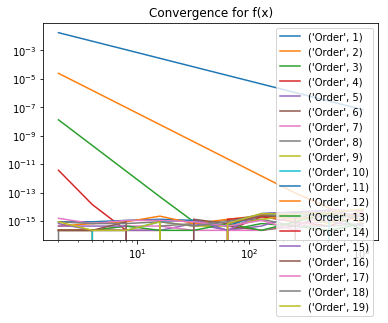

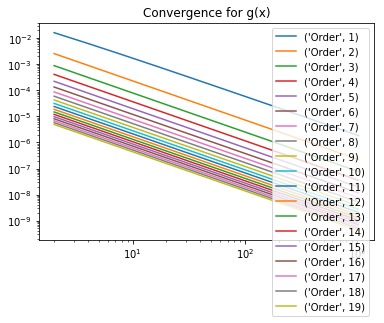

In [3]:
import math

f = lambda x: math.exp(x)
g = lambda x: x**(1/2)

maxm = 10
maxn = 20
X = np.zeros(maxm)
F = np.zeros((maxn, maxm))
G = np.zeros((maxn, maxm))

for i in range(1,maxm+1):
    X[i-1] = 2**i
    for j in range(1,maxn):
        intrule = LegendreQuad(j)
        F[j][i-1] = QuadIntegration(f,[0,1],2**i,intrule)
        G[j][i-1] = QuadIntegration(g,[0,1],2**i,intrule)
        
gE = 2./3.
fE = math.e - 1

plot.yscale('log')
plot.xscale('log')
for i in range(1, maxn):
    plot.plot(X,abs(F[i]-np.ones_like(F[i])*fE),label=("Order", i))
              
plot.legend(loc='upper right')
plot.title("Convergence for f(x)")
plot.show()

plot.yscale('log')
plot.xscale('log')
for i in range(1, maxn):
    plot.plot(X,abs(G[i]-np.ones_like(G[i])*gE),label=("Order", i))
              
plot.legend(loc='upper right')
plot.title("Convergence for g(x)")
plot.show()


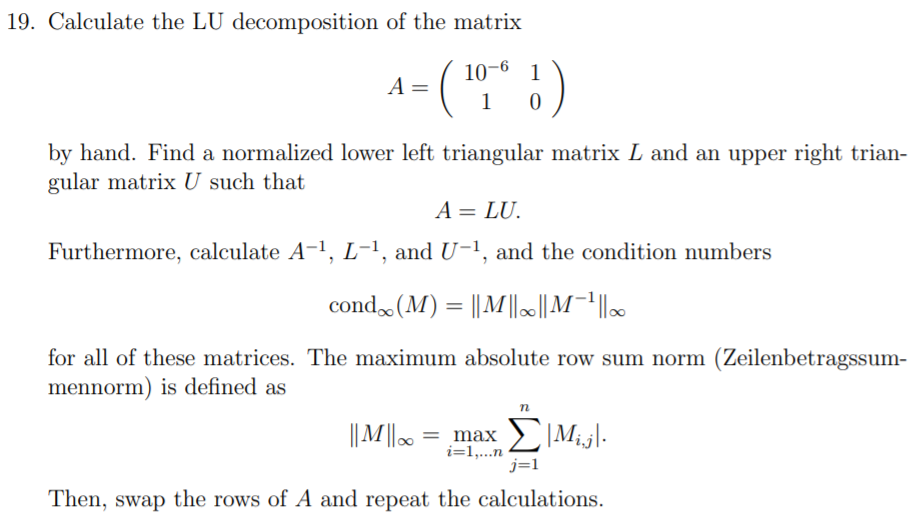

$$A= \begin{pmatrix} 10^{-6} & 1 \\ 1 & 0 \end{pmatrix} $$
operation: $R_2 = R_2 - 10^6R_1$
$$ U = \begin{pmatrix} 10^{-6} & 1 \\ 0 & -10^{6} \end{pmatrix} $$
Thus we get $$ L = \begin{pmatrix} 1 & 0 \\ 10^6 & 1 \end{pmatrix}$$

$$ A^{-1} = \frac{1}{-1} \begin{pmatrix} 0 & -1 \\ -1 & 10^{-6} \end{pmatrix} = \begin{pmatrix} 0 & 1 \\ 1 & -10^{-6} \end{pmatrix} $$

$$ U^{-1} = \frac{1}{-1} \begin{pmatrix} -10^6 & -1 \\ 0 & 10^{-6} \end{pmatrix} = \begin{pmatrix} 10^6 & 1 \\ 0 & -10^{-6} \end{pmatrix} $$

$$ L^{-1} = \begin{pmatrix} 1 & 0 \\ -10^{-6} & 1 \end{pmatrix} $$

$$cond_\infty(A) = (1+10^{-6})(1+10^{-6}) \approx 1$$
$$cond_\infty(U) = (1+10^{6})(10^{6}) \approx 10^{12}$$
$$cond_\infty(L) = (1+10^{6})(1 + 10^{-6}) \approx 10^{6}$$

swapping rows: $$A= \begin{pmatrix} 1 & 0 \\ 10^{-6} & 1 \end{pmatrix} $$
operation: $R_2 = R_2 - 10^{-6}R_1$
$$ U = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} $$
$$ L = A $$

$$ A^{-1} = L^{-1} = \begin{pmatrix} 1 & 0 \\ -10^{-6} & 1 \end{pmatrix} $$
$$ U^{-1} = U $$

$$cond_\infty(A) = (1+10^{-6})(1+10^{-6}) \approx 1$$
$$cond_\infty(L) = cond_\infty(A) \approx 1$$
$$cond_\infty(U) = 1$$